In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [2]:
sam_df = pd.read_csv('samsung3.csv', encoding='cp949')
# sam = pd.read_excel('samsung2.xlsx')

In [3]:
sam_df

,자료일자,시가,고가,저가,종가,기본거래량
0,2022-09-30,52300,53600,51800,53100,22503249
1,2022-09-29,53300,53700,52600,52600,13882080
2,2022-09-28,53900,54400,52500,52900,19991129
3,2022-09-27,53800,54200,53500,54200,16631289
4,2022-09-26,53700,54200,53600,53900,15008449
...,...,...,...,...,...,...
495,2020-09-25,57700,58200,57700,57900,11444683
496,2020-09-24,57700,58600,57600,57800,17564020
497,2020-09-23,58400,58800,57400,58600,20111398
498,2020-09-22,59100,59700,57800,58200,20830381


In [4]:
sam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자료일자    500 non-null    object
 1   시가      500 non-null    int64 
 2   고가      500 non-null    int64 
 3   저가      500 non-null    int64 
 4   종가      500 non-null    int64 
 5   기본거래량   500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [5]:
sam_df = sam_df.rename(columns={'자료일자':'Date','시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '기본거래량':'Volume'})
sam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    500 non-null    object
 1   Open    500 non-null    int64 
 2   High    500 non-null    int64 
 3   Low     500 non-null    int64 
 4   Close   500 non-null    int64 
 5   Volume  500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [6]:
# sam_df['3'] = sam_df['Close'].rolling(3).mean()

In [7]:
sam_df['5'] = sam_df['Close'].rolling(5).mean()
sam_df['20'] = sam_df['Close'].rolling(20).mean()
sam_df['60'] = sam_df['Close'].rolling(60).mean()
sam_df['120'] = sam_df['Close'].rolling(120).mean()

In [8]:
sam_df['20'][499]

59450.0

<function matplotlib.pyplot.show(*args, **kw)>

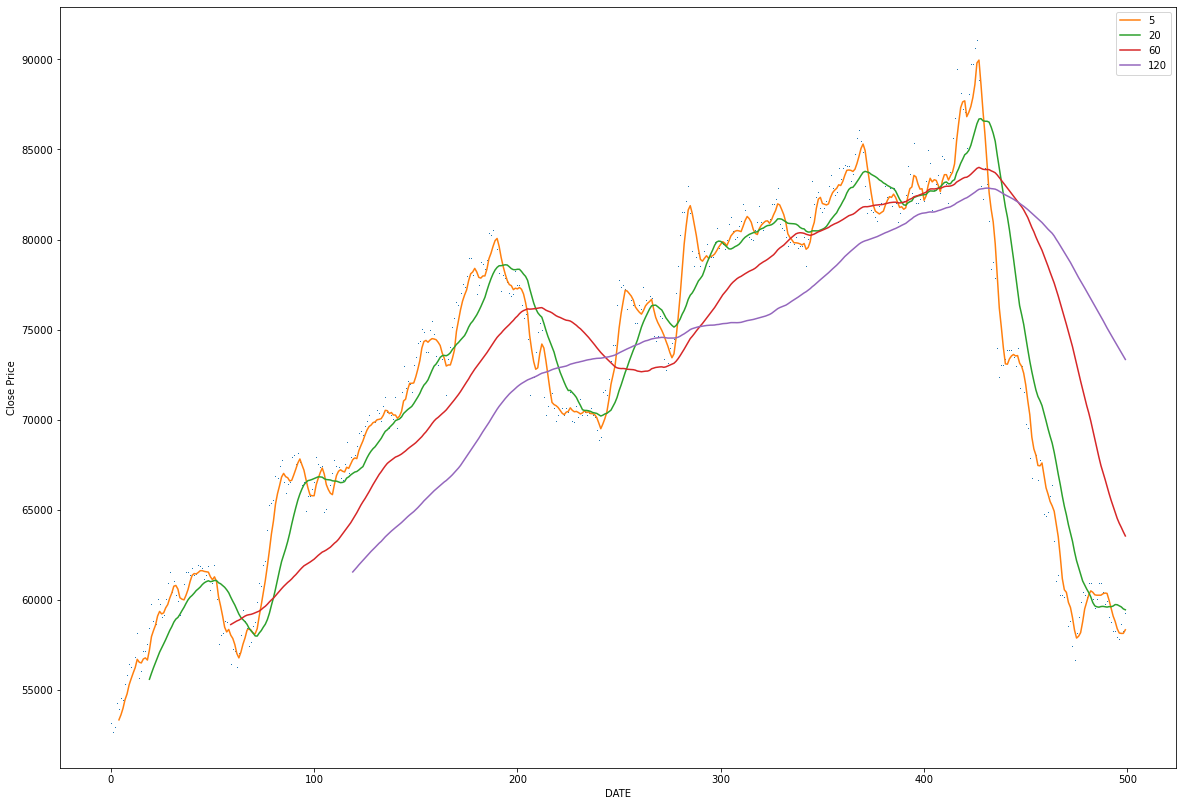

In [9]:
plt.figure(figsize=(20,14))
plt.plot(sam_df.index,sam_df['Close'],',')
plt.plot(sam_df['5'], label='5')
plt.plot(sam_df['20'],label='20')
plt.plot(sam_df['60'],label='60')
plt.plot(sam_df['120'],label='120')
plt.xlabel('DATE')
plt.ylabel('Close Price')
plt.legend()

plt.show

In [10]:
if sam_df['5'][499]<sam_df['20'][499] and sam_df['20'][499]<sam_df['60'][499] and sam_df['60'][499]<sam_df['120'][499]:
    print("상승세")


상승세


In [11]:
sam_df

,Date,Open,High,Low,Close,Volume,5,20,60,120
0,2022-09-30,52300,53600,51800,53100,22503249,NaN,NaN,NaN,NaN
1,2022-09-29,53300,53700,52600,52600,13882080,NaN,NaN,NaN,NaN
2,2022-09-28,53900,54400,52500,52900,19991129,NaN,NaN,NaN,NaN
3,2022-09-27,53800,54200,53500,54200,16631289,NaN,NaN,NaN,NaN
4,2022-09-26,53700,54200,53600,53900,15008449,53340.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
495,2020-09-25,57700,58200,57700,57900,11444683,58400.0,59730.0,64521.666667,74113.333333
496,2020-09-24,57700,58600,57600,57800,17564020,58160.0,59670.0,64253.333333,73918.333333
497,2020-09-23,58400,58800,57400,58600,20111398,58140.0,59610.0,64025.000000,73731.666667
498,2020-09-22,59100,59700,57800,58200,20830381,58140.0,59500.0,63778.333333,73535.000000


In [49]:
sam_df_td = sam_df.head(len(sam_df)-450) # 최근50일정도만 training

In [50]:
len(sam_df_td)

50

In [51]:
sam_df_train = sam_df.tail(len(sam_df_td)-1)

In [52]:
sam_df_close = sam_df_train['Close']
sam_df_close = sam_df_close.values

In [53]:
days=[]
for i in range(1,len(sam_df_train)+1):
    days.append([int(i+1)])

In [54]:
len(sam_df_close)

49

In [55]:
len(days)

49

In [90]:
rbf_svr = SVR(kernel='rbf', C=10000, gamma=0.0001)
rbf_svr.fit(days,sam_df_close)

lin_svr = SVR(kernel="linear", C=10000)
lin_svr.fit(days,sam_df_close)

poly_svr = SVR(kernel="linear", C=10000, degree=2)
poly_svr.fit(days,sam_df_close)

SVR(C=10000, degree=2, kernel='linear')

In [113]:
day = [[len(days)+1]]
print("RBF SVR 예측가격:",rbf_svr.predict(day))
print("Linear SVR 예측가격:",lin_svr.predict(day))
print("Poly SVR 예측가격:",poly_svr.predict(day))

RBF SVR 예측가격: [57888.17240679]
Linear SVR 예측가격: [57200.15454955]
Poly SVR 예측가격: [57200.15454955]


In [132]:
pred_price = []
for i in range(len(days)):
    pred_price.append(rbf_svr.predict([[i]]))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

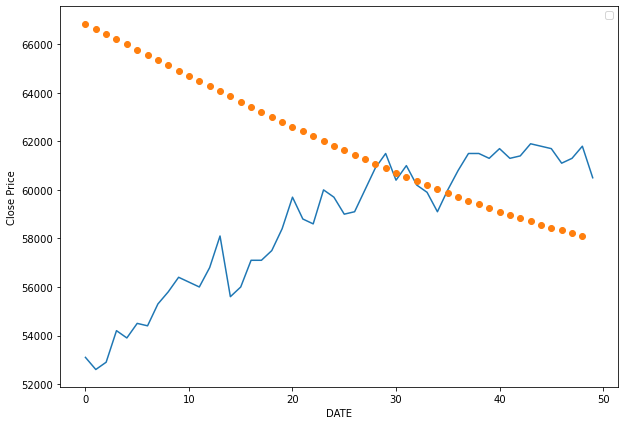

In [133]:
plt.figure(figsize=(10,7))
plt.plot(sam_df_td.index,sam_df_td['Close'])
plt.plot(pred_price,'o')
# plt.plot(sam_df['20'],label='20')
# plt.plot(sam_df['60'],label='60')
# plt.plot(sam_df['120'],label='120')
plt.xlabel('DATE')
plt.ylabel('Close Price')
plt.legend()

plt.show